<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Image-Negatives" data-toc-modified-id="Image-Negatives-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>Image Negatives</a></span></li><li><span><a href="#Log-Transformations" data-toc-modified-id="Log-Transformations-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Log Transformations</a></span></li><li><span><a href="#Power-law-transformation" data-toc-modified-id="Power-law-transformation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Power-law transformation</a></span></li><li><span><a href="#contrast-stretching" data-toc-modified-id="contrast-stretching-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>contrast stretching</a></span></li><li><span><a href="#Gray-level-slicing" data-toc-modified-id="Gray-level-slicing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Gray-level slicing</a></span></li><li><span><a href="#Bit-plane-slicing" data-toc-modified-id="Bit-plane-slicing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Bit-plane slicing</a></span></li><li><span><a href="#Histogram-Processing" data-toc-modified-id="Histogram-Processing-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Histogram Processing</a></span><ul class="toc-item"><li><span><a href="#calculating-histogram-for-different-images" data-toc-modified-id="calculating-histogram-for-different-images-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>calculating histogram for different images</a></span></li><li><span><a href="#Histogram-Equalization" data-toc-modified-id="Histogram-Equalization-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Histogram Equalization</a></span></li></ul></li><li><span><a href="#Enhancement-using-Arithmetic/Logic-Operations" data-toc-modified-id="Enhancement-using-Arithmetic/Logic-Operations-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Enhancement using Arithmetic/Logic Operations</a></span><ul class="toc-item"><li><span><a href="#Arithmetic-Operations" data-toc-modified-id="Arithmetic-Operations-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Arithmetic Operations</a></span></li></ul></li><li><span><a href="#Median-Filter" data-toc-modified-id="Median-Filter-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Median Filter</a></span></li><li><span><a href="#High-boost-Filtering" data-toc-modified-id="High-boost-Filtering-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>High-boost Filtering</a></span></li><li><span><a href="#Sobel-Edge-Detector" data-toc-modified-id="Sobel-Edge-Detector-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Sobel Edge Detector</a></span></li></ul></div>

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# this block may raise an error in WINDOWS
!wget https://picsum.photos/200/300 -O sample.jpg

--2020-05-29 23:17:51--  https://picsum.photos/200/300
Resolving picsum.photos (picsum.photos)... 104.26.5.30, 104.26.4.30, 2606:4700:20::681a:41e, ...
Connecting to picsum.photos (picsum.photos)|104.26.5.30|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://i.picsum.photos/id/345/200/300.jpg [following]
--2020-05-29 23:17:59--  https://i.picsum.photos/id/345/200/300.jpg
Resolving i.picsum.photos (i.picsum.photos)... 104.26.5.30, 104.26.4.30, 2606:4700:20::681a:51e, ...
Connecting to i.picsum.photos (i.picsum.photos)|104.26.5.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8474 (8.3K) [image/jpeg]
Saving to: ‘sample.jpg’

sample.jpg          100%[===================>]   8.28K  --.-KB/s    in 0.02s   

2020-05-29 23:18:07 (395 KB/s) - ‘sample.jpg’ saved [8474/8474]



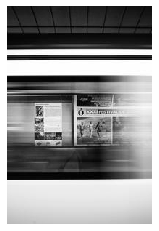

In [38]:
plt.imshow(cv2.imread("sample.jpg",0),cmap='gray')
plt.axis(False)
plt.show()

# Image Negatives
$$
s = L – 1 –r
$$

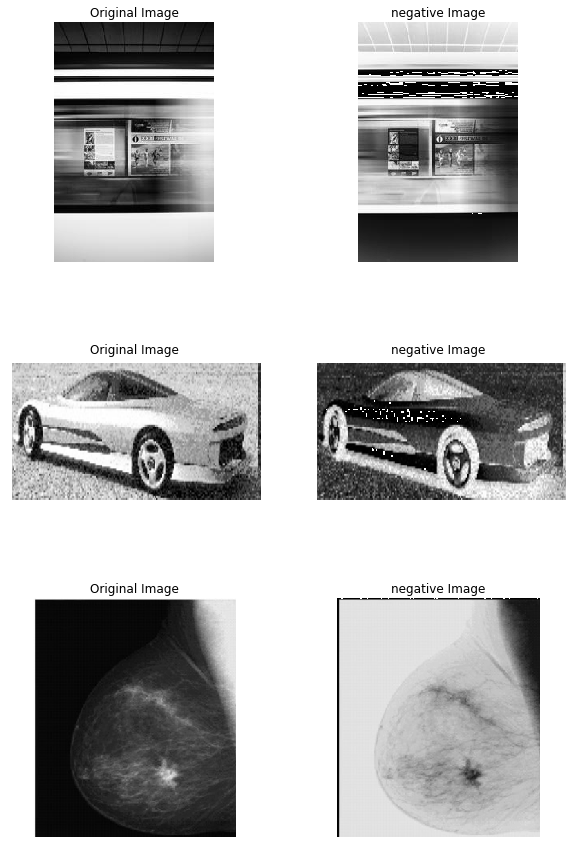

In [40]:
def Negative(img,L=None):
    if L==None:
        L=np.max(img)
    return L-1-img

testCases=['sample.jpg','neg0.png','neg1.png']
plt.figure(figsize=(10,len(testCases)*5))

for line,pic in enumerate(testCases):
    img=cv2.imread(pic,0)
    plt.subplot(len(testCases),2,2*line+1)
    plt.imshow(img,cmap='gray')
    plt.axis(False)
    plt.title("Original Image")
    plt.subplot(len(testCases),2,2*line+2)
    plt.imshow(Negative(img),cmap='gray')
    plt.axis(False)
    plt.title("negative Image")
plt.show()

# Log Transformations
$$
s = c*log (1+r)
$$
> c is a constant and r>=0

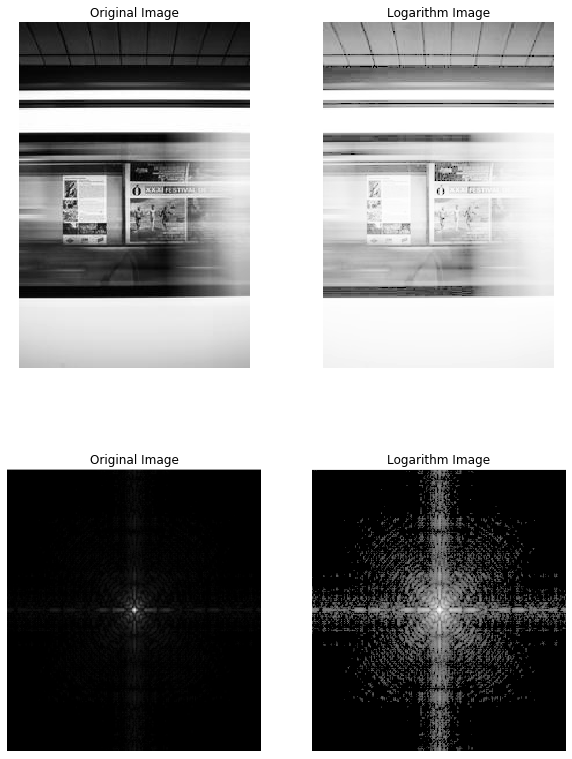

In [44]:
def LogTransformations(img,c=1):
    img[img==0]=1
    img=img.astype(np.int64)
    return c*np.log10(img)

testCases=['sample.jpg','log0.png',]
plt.figure(figsize=(10,len(testCases)*7))

for line,pic in enumerate(testCases):
    img=cv2.imread(pic,0)
    plt.subplot(len(testCases),2,2*line+1)
    plt.imshow(img,cmap='gray')
    plt.axis(False)
    plt.title("Original Image")
    plt.subplot(len(testCases),2,2*line+2)
    plt.imshow(LogTransformations(img),cmap='gray')
    plt.axis(False)
    plt.title("Logarithm Image")
#     plt.imshow(img,cmap='gray')
plt.show()

# Power-law transformation
$$
s=T(r)=c*r^\gamma
$$

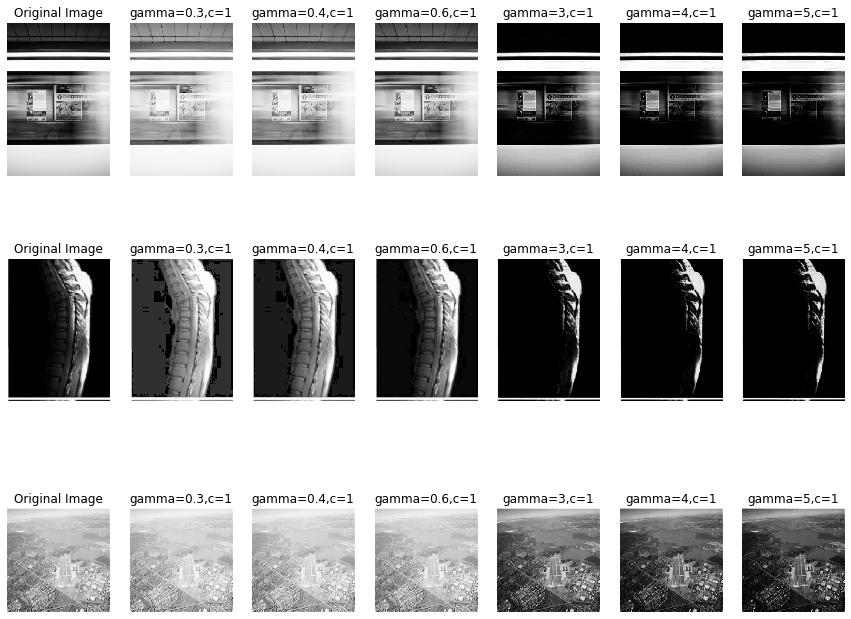

In [51]:
def PowerLawTransformation(img,gamma,c=1):
    img=c*255*(img.astype(np.int64)/255)**gamma
    img[img>255]=255
    return img.astype(np.int64)

testCases=['sample.jpg','powerLaw0.png','powerLaw1.png']
plt.figure(figsize=(15,len(testCases)*4))

for line,pic in enumerate(testCases):
    img=cv2.imread(pic,0)
    plt.subplot(len(testCases),7,7*line+1)
    plt.imshow(img,cmap='gray')
    plt.axis(False)
    plt.title("Original Image")
    for i,gamma in enumerate([0.3,0.4,0.6,3,4,5]):
        plt.subplot(len(testCases),7,7*line+2+i)
        plt.imshow(PowerLawTransformation(img,gamma),cmap='gray')
        plt.axis(False)
        plt.title(f"gamma={gamma},c=1")
plt.show()

# contrast stretching
$$
s=
\begin{cases}
\frac{s_{1}}{r_{1}} *pix & 0\leqslant pix\leqslant r_{1}\\
\frac{s_{2} -s_{1}}{r_{2} -r_{1}} *( pix-r_{1}) +s_{1} & r_{1} < pix\leqslant r_{2}\\
\frac{255-s_{2}}{255-r_{2}} *( pix-r_{2}) +s_{2} & r_{2} < pix
\end{cases}
$$

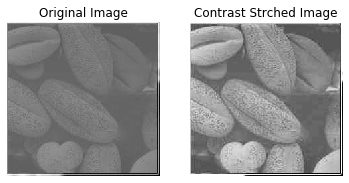

In [52]:
def pixelVal_contrastStreching(pix, r1, s1, r2, s2): 
    if 0<=pix<=r1:   return (s1/r1)*pix 
    elif r1<pix<=r2: return (s2-s1)/(r2-r1)*(pix-r1)+s1 
    else:            return (255-s2)/(255-r2)*(pix-r2)+s2 
def contrastStreching(img):
    return np.vectorize(pixelVal_contrastStreching)(img, 80, 55, 150, 255)

img=cv2.imread("Low-contrast-image.png",0).astype(np.int64)
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.axis(False)
plt.title("Original Image")
plt.subplot(1,2,2)
plt.imshow(contrastStreching(img),cmap='gray')
plt.axis(False)
plt.title("Contrast Strched Image")
plt.show()

# Gray-level slicing
**Objective**: Highlighting a specific range of gray levels in an image

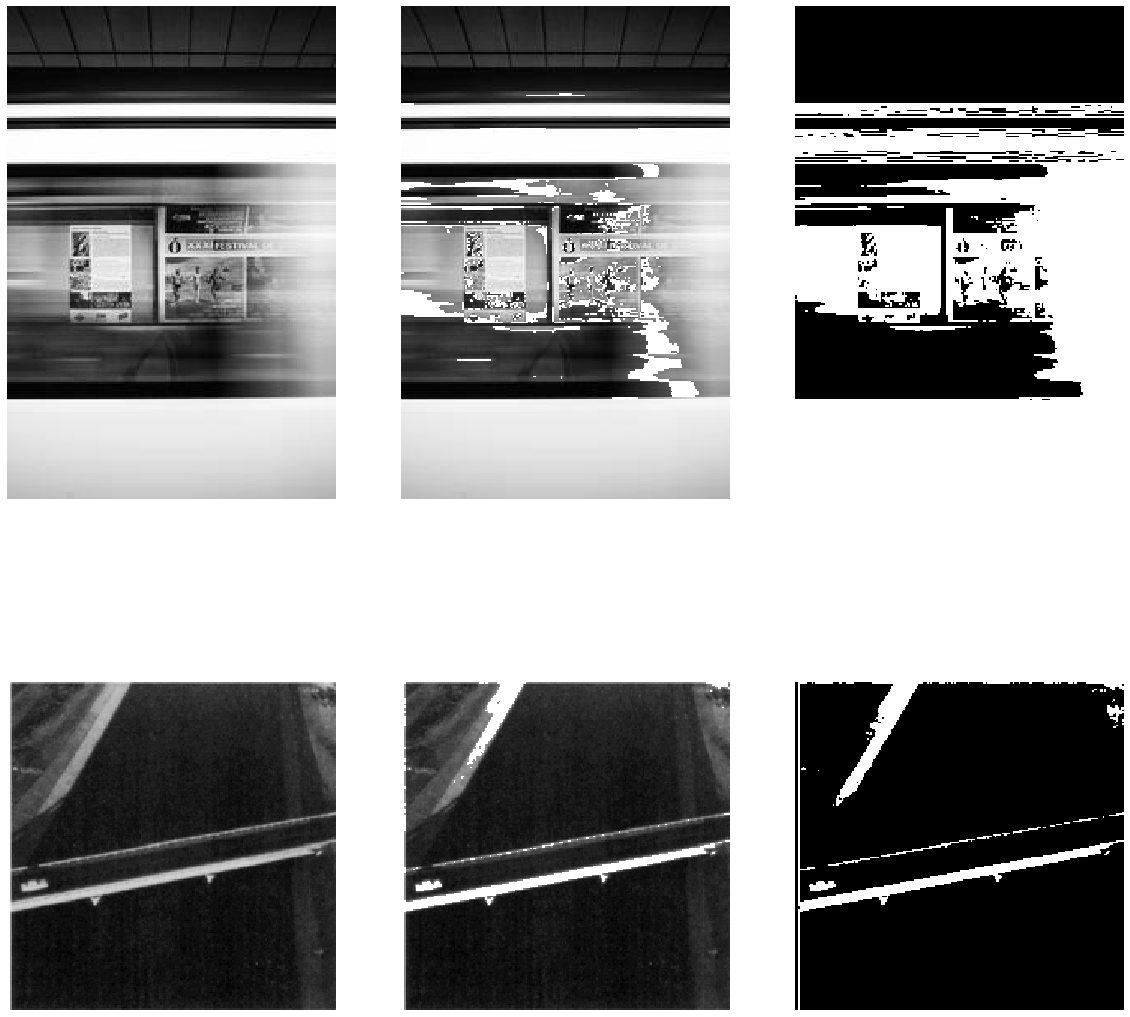

In [56]:
def GrayLevelSlicing(img,A,B,raisedValue,loweredValue=None):
    assert A<B
    renderdImg=img.copy()
    renderdImg[np.logical_and(img<=B,img>=A)]=raisedValue
    if loweredValue!=None:
        renderdImg[np.logical_or(img>=B,img<=A)]=loweredValue
    return renderdImg

plt.figure(figsize=(20,20))
img=cv2.imread("sample.jpg",0)
plt.subplot(2,3,1)
plt.imshow(img,cmap='gray')
plt.axis(False)
plt.subplot(2,3,2)
plt.imshow(GrayLevelSlicing(img,80,120,255),cmap='gray')
plt.axis(False)
plt.subplot(2,3,3)
plt.imshow(GrayLevelSlicing(img,100,255,255,100),cmap='gray')
plt.axis(False)
img=cv2.imread("GrayLevelSlicing.png",0)
plt.subplot(2,3,4)
plt.imshow(img,cmap='gray')
plt.axis(False)
plt.subplot(2,3,5)
plt.imshow(GrayLevelSlicing(img,150,255,255),cmap='gray')
plt.axis(False)
plt.subplot(2,3,6)
plt.imshow(GrayLevelSlicing(img,A=120,B=220,raisedValue=255,loweredValue=80),cmap='gray')
plt.axis(False)
plt.show()

# Bit-plane slicing

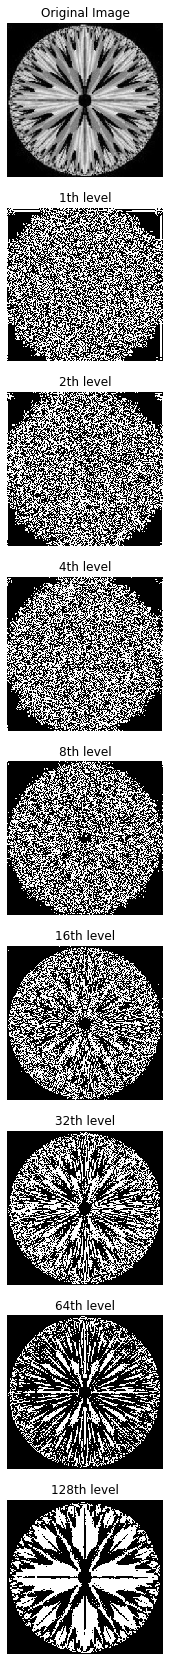

In [58]:
def BitPlaneSlicing(img):
     while np.any(img):
        yield img%2
        img//=2
        
img=cv2.imread("BitPlaneSlicing.png",0)
plt.figure(figsize=(3,30))
plt.subplot(9,1,1)
plt.imshow(img,cmap='gray')
plt.axis(False)
plt.title("Original Image")
for i,slicedImg in enumerate(BitPlaneSlicing(img)):
    plt.subplot(9,1,i+2)
    plt.imshow(slicedImg*2**i,cmap='gray')
    plt.axis(False)
    plt.title(f"{2**i}th level")
plt.show()

# Histogram Processing

sum of normalized histogram:  1.0


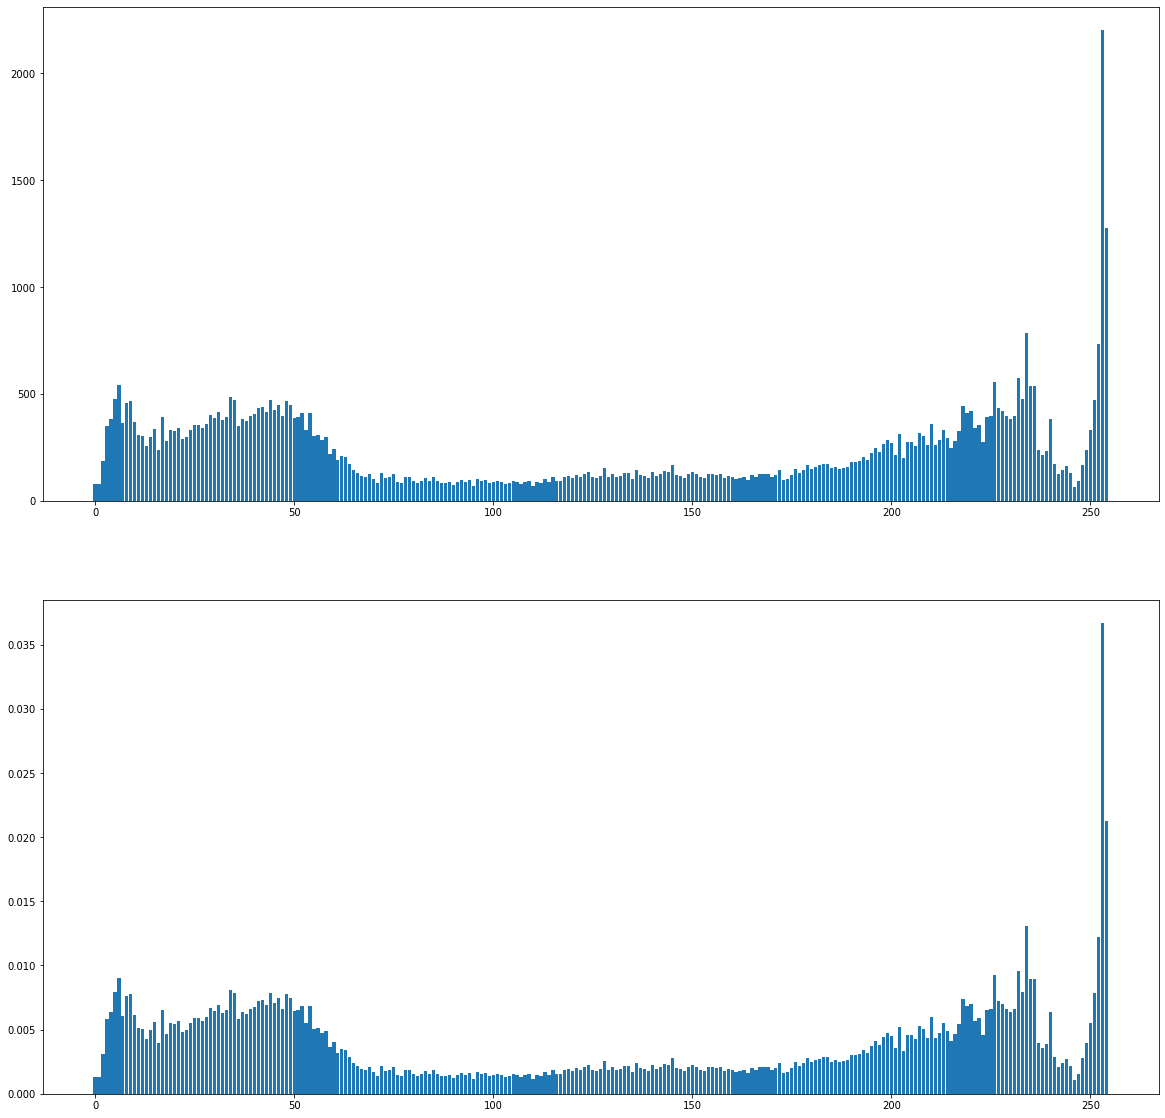

In [10]:
def Histogram(img):
    grayLevelRepitition=np.zeros(255)
    for line in img:
        for cell in line:
            grayLevelRepitition[cell-1]+=1
    return grayLevelRepitition

img=cv2.imread("sample.jpg",0)
histogram=Histogram(img)
normalizedHistogram=histogram/(img.shape[0]*img.shape[1])
print("sum of normalized histogram: ", np.sum(normalizedHistogram))
plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
plt.bar(range(255),histogram)
plt.subplot(2,1,2)
plt.bar(range(255),normalizedHistogram)
plt.show()

## calculating histogram for different images

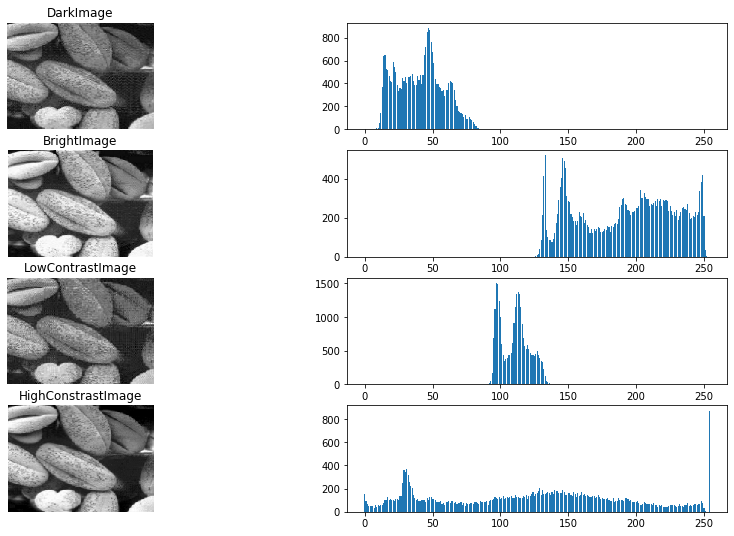

In [11]:
testCases=["DarkImage-forHistogram.png",
           "BrightImage-forHistogram.png",
           "LowContrastImage-forHistogram.png",
           "HighConstrastImage-forHistogram.png"]
i=0
plt.figure(figsize=(15,9))
for pic in testCases:
    i+=1
    plt.subplot(len(testCases),2,i)
    img=cv2.imread(pic,0)
    plt.imshow(img,cmap='gray')
    plt.title(pic.split("-")[0])
    plt.axis(False)
    i+=1
    plt.subplot(len(testCases),2,i)
    plt.bar(range(255),Histogram(img))


## Histogram Equalization
$$
h(v)=\mathrm {round} \left({\frac {cdf(v)-cdf_{min}}{(M\times N)-cdf_{min}}}\times (L-1)\right)
$$
**Where:** $cdf$ stands for *Cumulative Distribution Function*<br>
**Obviuosly:** $cdf_{min}$ is the minimum non-zero value of the cumulative distribution function<br>
**Also:** $M × N$ gives the image's number of pixels (where M is width and N the height)<br>
**And:** $L$ is the number of grey levels used (in most cases, 256).

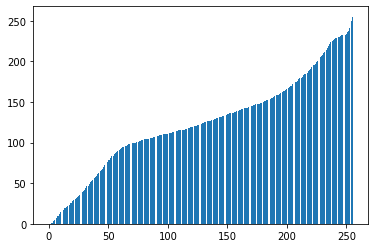

In [12]:
def HistogramEqualization(img):
    histogram=np.histogram(img.ravel(),256,[0,256])[0]
    cdf=np.cumsum(histogram)
    cdf_min=np.min(cdf[cdf!=0])
    size=img.shape[0]*img.shape[1]
    return np.round((cdf-cdf_min)/(size-cdf_min)*255)

img=cv2.imread("sample.jpg",0)
# print(HistogramEqualization(img))
plt.bar(range(256),HistogramEqualization(img))
plt.show()

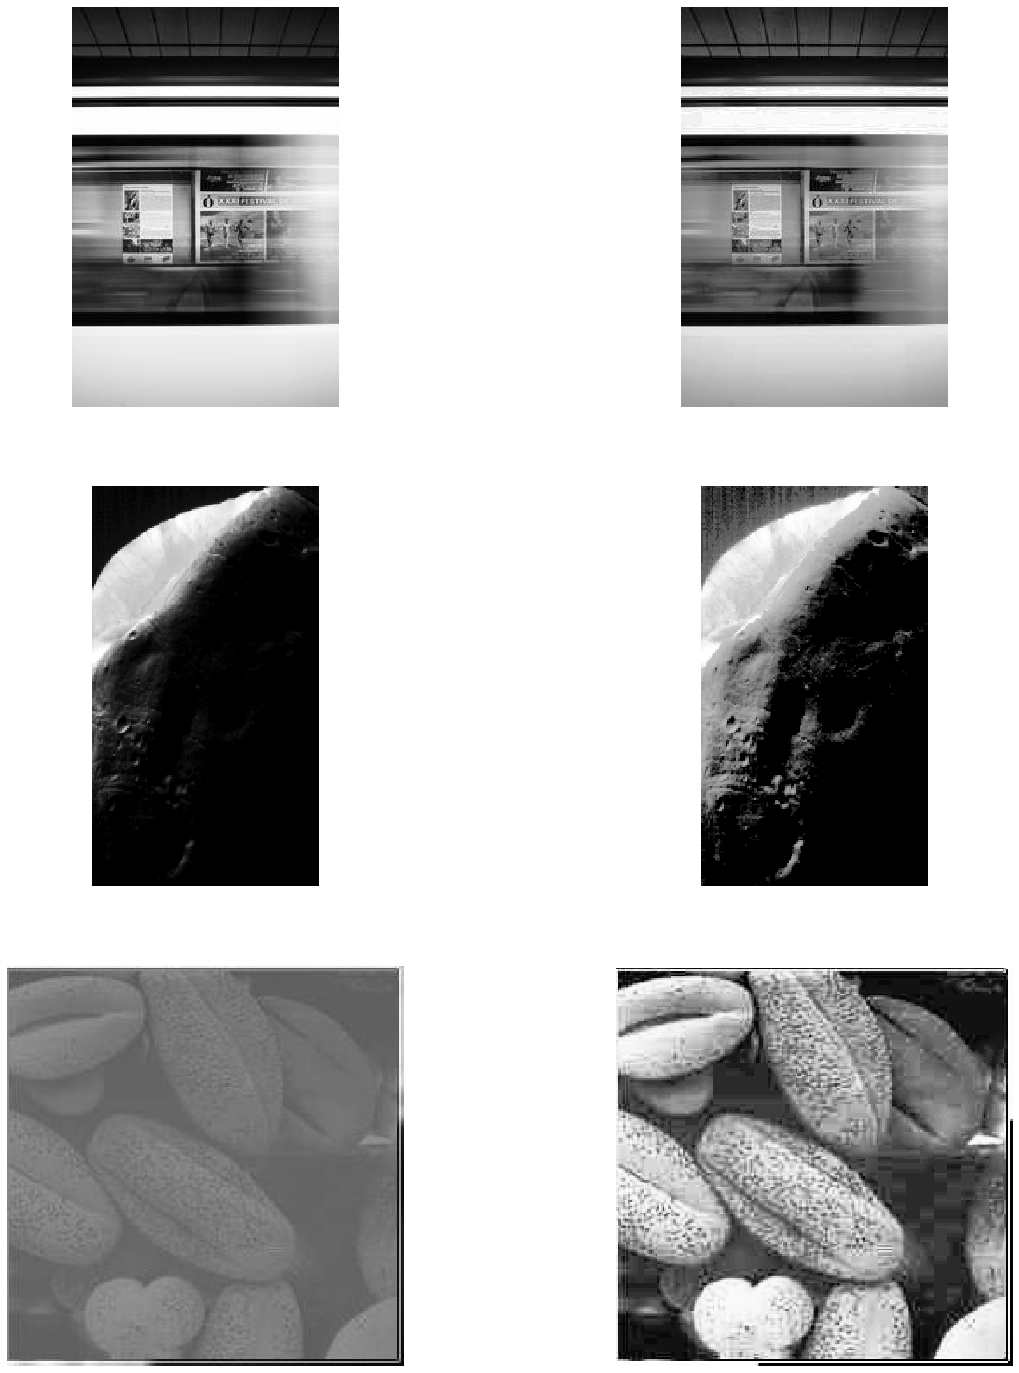

In [13]:
def Image_of_EqulizedHistogram(img):
    histogram=np.histogram(img.ravel(),256,[0,256])[0]
    cdf=np.cumsum(histogram)
    cdf_min=np.min(cdf[cdf!=0])
    size=img.shape[0]*img.shape[1]
    EqulizedHistogram=np.round((cdf-cdf_min)/(size-cdf_min)*255)
    newImg=img.copy()
    for i in range(256):
        newImg[img==i]=EqulizedHistogram[i]
    return newImg


testCases=['sample.jpg','HistogramEqualization.png','Low-contrast-image.png']
i=0
plt.figure(figsize=(20,25))
for pic in testCases:
    img=cv2.imread(pic,0)
    i+=1
    plt.subplot(len(testCases),2,i)
    plt.imshow(img,cmap='gray')
    plt.axis(False)
    i+=1
    plt.subplot(len(testCases),2,i)
    plt.imshow(Image_of_EqulizedHistogram(img),cmap='gray')
    plt.axis(False)
plt.show()

# Enhancement using Arithmetic/Logic Operations

## Arithmetic Operations
$$
AND\begin{cases}
x.0=0\\
x.1=x
\end{cases}
$$<br>
$$
OR\begin{cases}
x+0=x\\
x+1=1
\end{cases}
$$<br>
$$
XOR \begin{cases}
x\oplus 1=\overline{x}\\
x\oplus 0=x
\end{cases}
$$


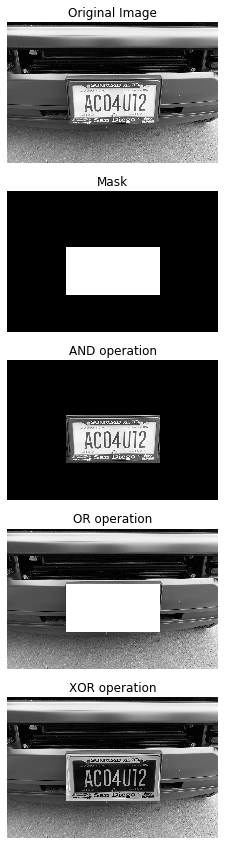

In [14]:
def LogicOperations(orignImg,originalMask,operation):
    if operation not in ['AND','OR','XOR']:
        raise ValueError(f"the operation must be either AND, OR, XOR\n!!!")
    img=orignImg.copy()
    mask=originalMask.copy()
    minRow=min(mask.shape[0],img.shape[0])
    minCol=min(mask.shape[1],img.shape[1])
    mask=mask[:minRow,:minCol]
    img=img[:minRow,:minCol]
    mask[mask<124]=0
    mask[mask>124]=1
    if operation=='AND':
        img[mask==0]=0
    elif operation=='OR':
        img[mask==1]=255
    elif operation=='XOR':
        notImg=255-img
        img[mask==1]=notImg[mask==1]
    return img

img=cv2.imread("ArithmaticOperations.jpg",0)
plt.figure(figsize=(10,15))
plt.subplot(5,1,1)
plt.imshow(img,cmap='gray')
plt.axis(False)
plt.title("Original Image")
mask=cv2.imread('maskForArithmaticOperation.jpg',0)
plt.subplot(5,1,2)
plt.imshow(mask,cmap='gray')
plt.axis(False)
plt.title("Mask")
i=2
for op in ['AND','OR','XOR']:
    i+=1
    plt.subplot(5,1,i)
    plt.imshow(LogicOperations(img,mask,op),cmap='gray')
    plt.axis(False)
    plt.title(f"{op} operation")
plt.show()

# High-boost Filtering

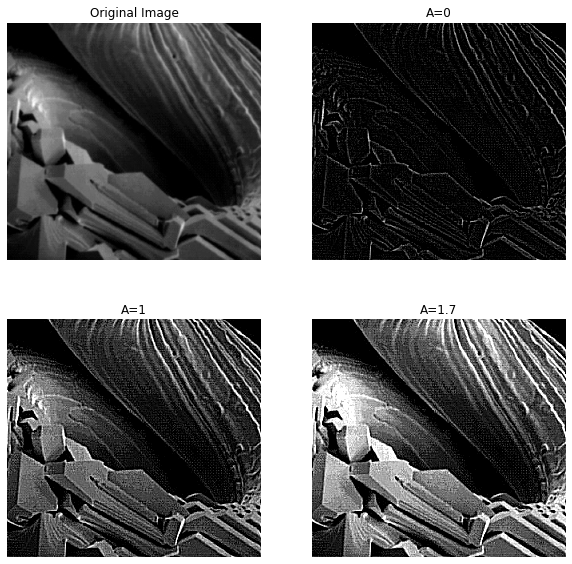

In [59]:
def HighBoostFiltering(originImg,A):
    HBFilter=np.array([[-1,-1  ,-1],
                       [-1,A+8 ,-1],
                       [-1,-1  ,-1]])
    return cv2.filter2D(originImg,-1,HBFilter)

img=cv2.imread("HighBoostFilter.png",0)
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(img,cmap='gray')
plt.axis(False)
plt.title("Original Image")
i=1
for A in [0,1,1.7]:
    i+=1
    plt.subplot(2,2,i)
    plt.imshow(HighBoostFiltering(img,A),cmap='gray')
    plt.axis(False)
    plt.title(f"A={A}")
plt.show()

# Sobel Edge Detector

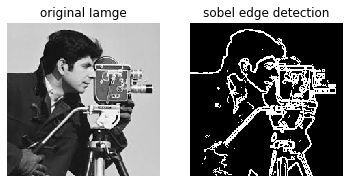

In [37]:
img=cv2.imread("sobel.jpeg",0)
grad_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)
sobel = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
sobel[sobel<100]=0
sobel[sobel>100]=255
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.axis(False)
plt.title("original Iamge")
plt.subplot(1,2,2)
plt.imshow(sobel,cmap='gray')
plt.axis(False)
plt.title("sobel edge detection")
plt.show()

In [60]:
print("Finished! :)")

Finished! :)
